## Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Preparation

Load data

In [2]:
data_columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
data_path = './Dataset/breast+cancer+wisconsin+diagnostic/wdbc.data'
data = pd.read_csv(data_path, header=None, names=data_columns)

print(data.head())
print("Breast Cancer - Data shape:", data.shape)

# Preprocess
X = data.drop(['ID', 'Diagnosis'], axis=1)  # Features
Y = data['Diagnosis'].map({'M': 1, 'B': 0})  # Target: M=1, B=0

# Scale features
scaler_data = StandardScaler()
X_scaled = scaler_data.fit_transform(X)

print("Breast Cancer - Features shape:", X_scaled.shape)
print("Breast Cancer - Target shape:", Y.shape)

         ID Diagnosis  feature_1  feature_2  feature_3  feature_4  feature_5  \
0    842302         M      17.99      10.38     122.80     1001.0    0.11840   
1    842517         M      20.57      17.77     132.90     1326.0    0.08474   
2  84300903         M      19.69      21.25     130.00     1203.0    0.10960   
3  84348301         M      11.42      20.38      77.58      386.1    0.14250   
4  84358402         M      20.29      14.34     135.10     1297.0    0.10030   

   feature_6  feature_7  feature_8  ...  feature_21  feature_22  feature_23  \
0    0.27760     0.3001    0.14710  ...       25.38       17.33      184.60   
1    0.07864     0.0869    0.07017  ...       24.99       23.41      158.80   
2    0.15990     0.1974    0.12790  ...       23.57       25.53      152.50   
3    0.28390     0.2414    0.10520  ...       14.91       26.50       98.87   
4    0.13280     0.1980    0.10430  ...       22.54       16.67      152.20   

   feature_24  feature_25  feature_26  featu

Data Exploration


In [3]:
data.describe()
data.isnull().sum()

ID            0
Diagnosis     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
dtype: int64

Split proportions and perform 

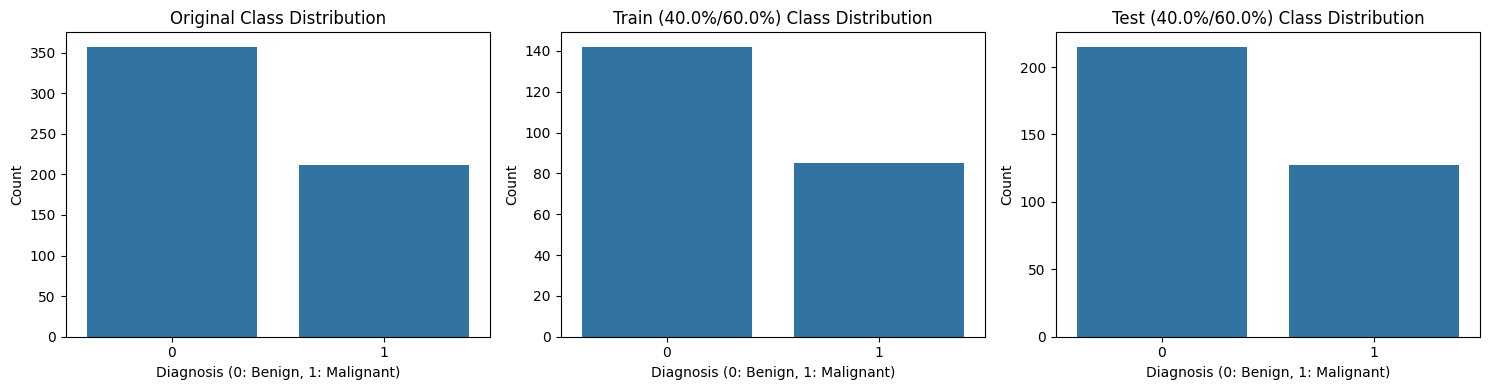


Proportions for 40.0%/60.0% split:
Original class distribution (%): Diagnosis
0    62.741652
1    37.258348
Name: proportion, dtype: float64
Train class distribution (%): Diagnosis
0    62.555066
1    37.444934
Name: proportion, dtype: float64
Test class distribution (%): Diagnosis
0    62.865497
1    37.134503
Name: proportion, dtype: float64


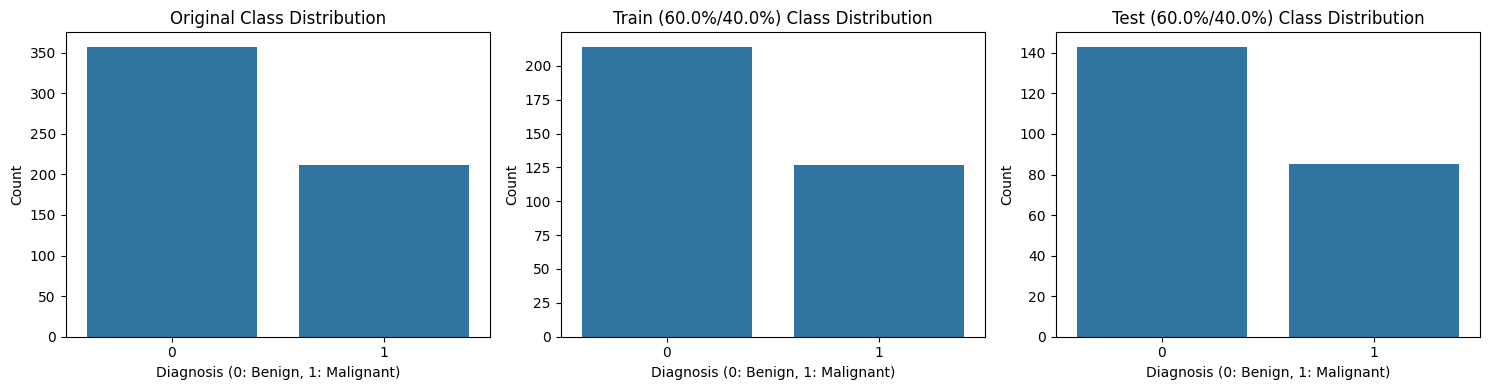


Proportions for 60.0%/40.0% split:
Original class distribution (%): Diagnosis
0    62.741652
1    37.258348
Name: proportion, dtype: float64
Train class distribution (%): Diagnosis
0    62.756598
1    37.243402
Name: proportion, dtype: float64
Test class distribution (%): Diagnosis
0    62.719298
1    37.280702
Name: proportion, dtype: float64


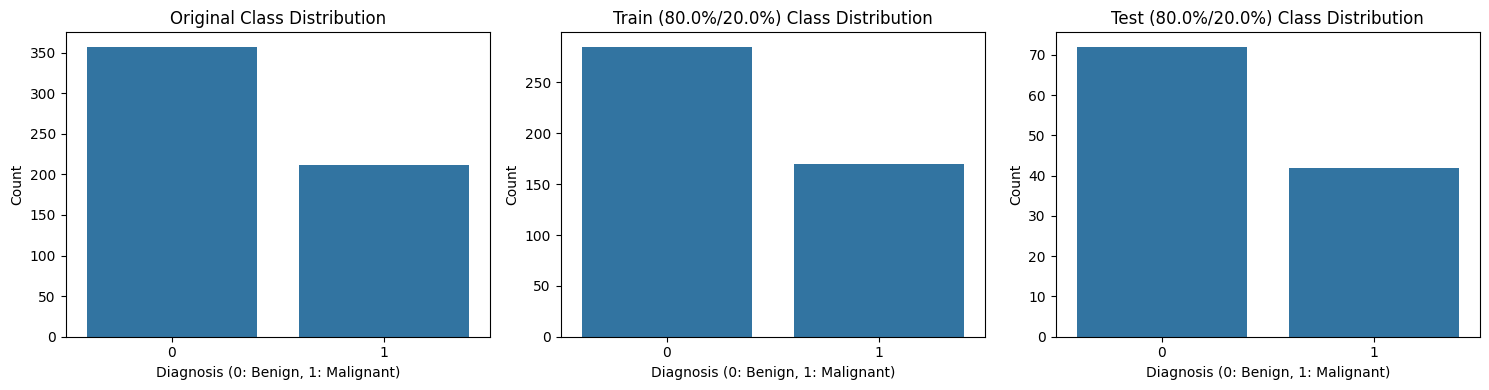


Proportions for 80.0%/20.0% split:
Original class distribution (%): Diagnosis
0    62.741652
1    37.258348
Name: proportion, dtype: float64
Train class distribution (%): Diagnosis
0    62.637363
1    37.362637
Name: proportion, dtype: float64
Test class distribution (%): Diagnosis
0    63.157895
1    36.842105
Name: proportion, dtype: float64


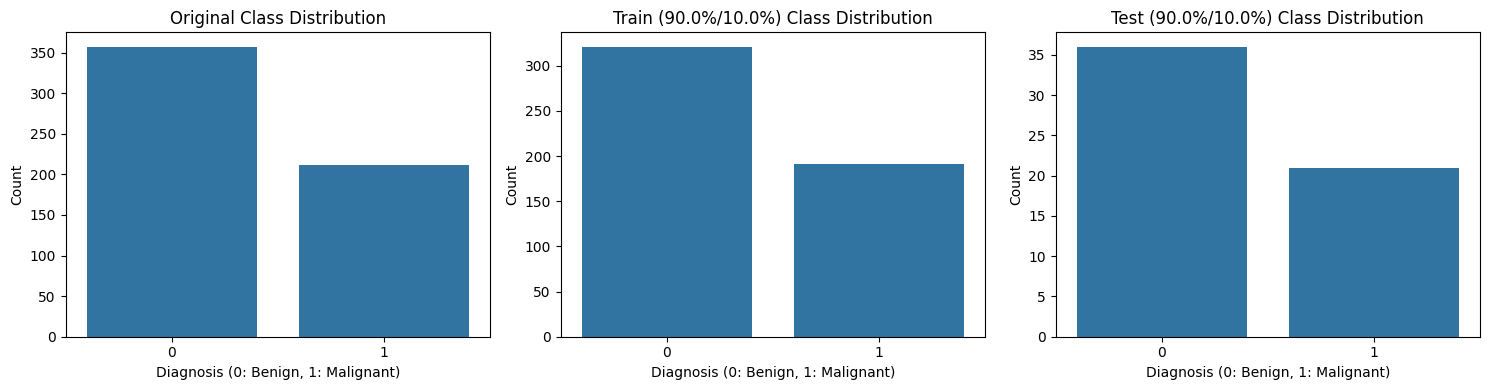


Proportions for 90.0%/10.0% split:
Original class distribution (%): Diagnosis
0    62.741652
1    37.258348
Name: proportion, dtype: float64
Train class distribution (%): Diagnosis
0    62.695312
1    37.304688
Name: proportion, dtype: float64
Test class distribution (%): Diagnosis
0    63.157895
1    36.842105
Name: proportion, dtype: float64


In [10]:
proportions = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]
subsets = {}

for train_size, test_size in proportions:
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, Y, train_size=train_size, test_size=test_size, 
        stratify=Y, shuffle=True, random_state=42
    )
    
    # Lưu trữ 4 tập con
    subsets[f'feature_train_{int(train_size*100)}'] = X_train
    subsets[f'label_train_{int(train_size*100)}'] = y_train
    subsets[f'feature_test_{int(test_size*100)}'] = X_test
    subsets[f'label_test_{int(test_size*100)}'] = y_test
    
    # Hiển thị phân phối lớp
    plt.figure(figsize=(15, 4))
    
    # Original dataset
    plt.subplot(1, 3, 1)
    sns.countplot(x=Y, order=[0, 1])
    plt.title('Original Class Distribution')
    plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
    plt.ylabel('Count')
    
    # Training set
    plt.subplot(1, 3, 2)
    sns.countplot(x=y_train, order=[0, 1])
    plt.title(f'Train ({train_size*100}%/{test_size*100}%) Class Distribution')
    plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
    plt.ylabel('Count')
    
    # Test set
    plt.subplot(1, 3, 3)
    sns.countplot(x=y_test, order=[0, 1])
    plt.title(f'Test ({train_size*100}%/{test_size*100}%) Class Distribution')
    plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()
    
    # In thông tin phân phối lớp cho mỗi tập hợp
    print(f"\nProportions for {train_size*100}%/{test_size*100}% split:")
    print("Original class distribution (%):", Y.value_counts(normalize=True) * 100)
    print("Train class distribution (%):", y_train.value_counts(normalize=True) * 100)
    print("Test class distribution (%):", y_test.value_counts(normalize=True) * 100)